In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##storing Total Dataset which has been sampled and cleaned into one dataframe
address = "../Data/Sampled and Cleaned data/TotalData_Cleaned_Sampled.csv"
data = pd.read_csv(address)
df = pd.DataFrame(data)

#creating one dataframe to store outliers
dfi = pd.DataFrame()

#Keeping track of standard deviation and mean for both speed and signal strength values
x1 = df['speed'].std()
y1 = df['speed'].mean()
x2 = df['signal_strength'].std()
y2 = df['signal_strength'].mean()

#applying z score normalization
df['signal_strength']=(df['signal_strength']-df['signal_strength'].mean())/df['signal_strength'].std()
df['speed']=(df['speed']-df['speed'].mean())/df['speed'].std()

#Tested all the outlier thresholds to find that only outliers exist with z score values greater than 3 for speed 
#so storing them in dfi
dfi = dfi.append(df.loc[df['speed'] > 3]).copy()

#Removing all outliers
df = df.loc[df['speed'] <= 3].copy()

#converting normalized values back to real values in outlier dataframe
dfi['speed']=dfi['speed']*x1+y1
dfi['signal_strength']=dfi['signal_strength']*x2+y2

#converting normalized values back to real values in main dataframe which has no outliers
df['speed']=df['speed']*x1+y1
df['signal_strength']=df['signal_strength']*x2+y2

In [9]:
#insert additional column
dfi.insert(8, 'Count', 1)
dfi

,service_provider,technology,download/upload,speed,signal_strength,state,Month,Year,Count
17,JIO,4G,download,62441.0,-65.0,Gujarat,July,2018,1
31,JIO,4G,download,75071.0,-62.0,Gujarat,July,2018,1
44,JIO,4G,download,77141.0,-66.0,Gujarat,July,2018,1
63,JIO,4G,download,80360.0,-63.0,Gujarat,July,2018,1
67,JIO,4G,download,74237.0,-59.0,Gujarat,July,2018,1
...,...,...,...,...,...,...,...,...,...
340972,JIO,4G,download,65624.0,-52.0,Bihar,March,2019,1
340983,JIO,4G,download,67291.0,-52.0,Bihar,March,2019,1
340987,JIO,4G,download,61604.0,-52.0,Bihar,March,2019,1
341676,JIO,4G,download,90568.0,-84.0,Assam,March,2019,1


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(100,100))
sns.set(style="darkgrid")

<Figure size 7200x7200 with 0 Axes>

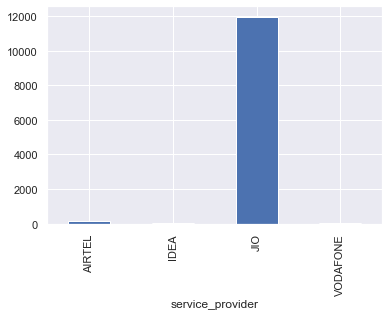

In [11]:
plot1 = dfi.groupby('service_provider').Count.sum().plot(kind ='bar')

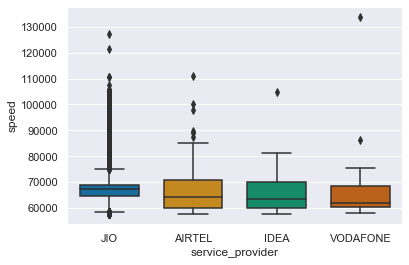

In [12]:
plot2 = sns.boxplot(y='speed', x='service_provider', data=dfi, width=0.7, palette="colorblind")

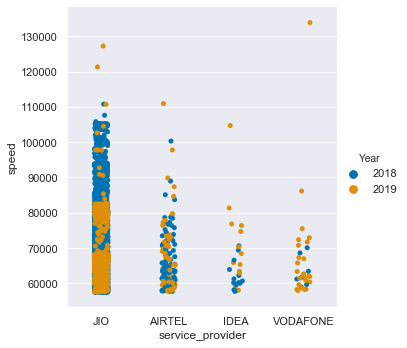

In [13]:
plot3 = sns.catplot(y='speed', x='service_provider', hue='Year', data=dfi, palette="colorblind")